In [1]:
# 1. Import thư viện cần thiết
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

 # **8:2**

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('ETH.csv')
df1=df.reset_index()['Close']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,2019-03-05,127.792953,138.229981,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...,...
1899,2024-05-12,2911.658203,2953.047363,2902.201904,2928.701904,2928.701904,5908941395
1900,2024-05-13,2928.813965,2994.869141,2865.134521,2949.359619,2949.359619,13352264795
1901,2024-05-14,2949.213135,2959.546631,2863.545898,2881.157959,2881.157959,12444516140
1902,2024-05-15,2881.224609,3041.602295,2864.735352,3037.056641,3037.056641,14666902956


In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 13s 272ms/step - loss: 0.0259 - val_loss: 0.0071
Epoch 2/100
23/23 [==============================] - 5s 212ms/step - loss: 0.0037 - val_loss: 0.0022
Epoch 3/100
23/23 [==============================] - 4s 180ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 4/100
23/23 [==============================] - 5s 232ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 5/100
23/23 [==============================] - 5s 192ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 6/100
23/23 [==============================] - 4s 182ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 7/100
23/23 [==============================] - 6s 253ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 8/100
23/23 [==============================] - 4s 184ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 9/100
23/23 [==============================] - 4s 180ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 10/100
23/23 [==============================] - 6s 247ms/step - loss: 0.0017 - val_l

In [10]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 39ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [12]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

Testing RMSE: 79.82501877325177
Testing MAE: 53.56845483487726
Testing MAPE: 0.020980872825229736


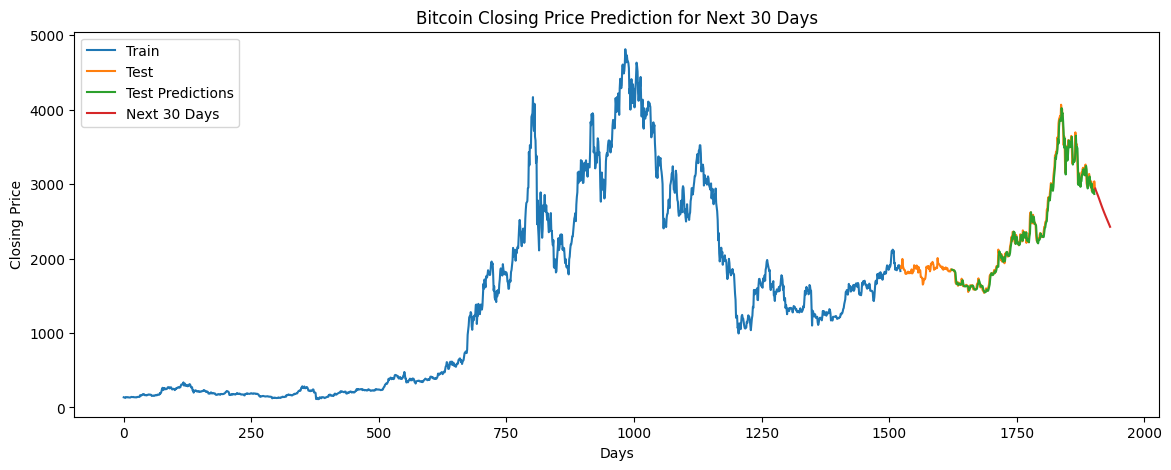

Predicted closing prices for the next 30 days:
[2940.9304 2918.0505 2900.7476 2883.921  2866.8154 2849.1611 2830.911
 2812.1501 2793.0244 2773.6982 2754.328  2735.048  2715.9624 2697.1484
 2678.6536 2660.5005 2642.6895 2625.2046 2608.015  2591.08   2574.3552
 2557.7905 2541.3413 2524.9646 2508.623  2492.2856 2475.9307 2459.544
 2443.1208 2426.6624]


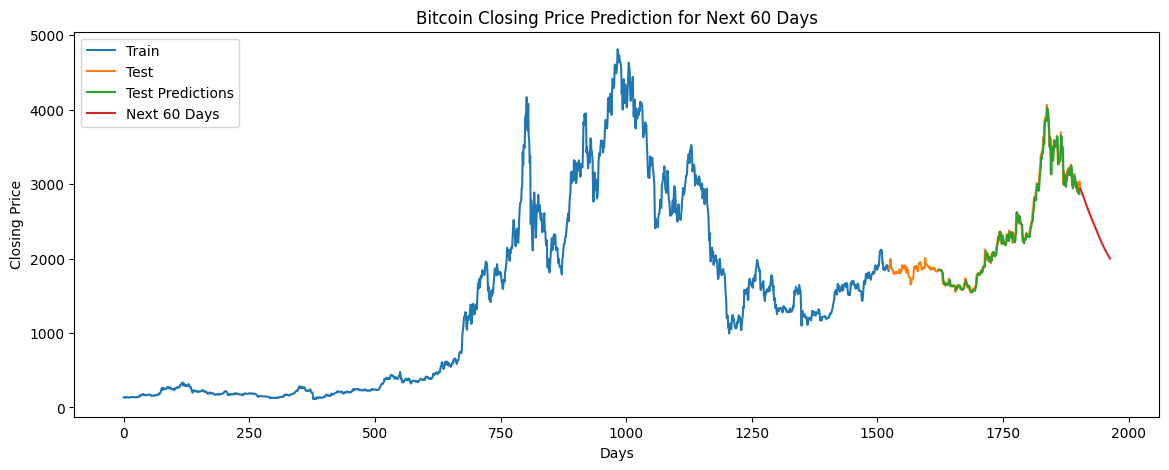

Predicted closing prices for the next 60 days:
[2940.9304 2918.0505 2900.7476 2883.921  2866.8154 2849.1611 2830.911
 2812.1501 2793.0244 2773.6982 2754.328  2735.048  2715.9624 2697.1484
 2678.6536 2660.5005 2642.6895 2625.2046 2608.015  2591.08   2574.3552
 2557.7905 2541.3413 2524.9646 2508.623  2492.2856 2475.9307 2459.544
 2443.1208 2426.6624 2410.1787 2393.6846 2377.2007 2360.75   2344.3586
 2328.0544 2311.864  2295.8135 2279.9275 2264.2266 2248.73   2233.4539
 2218.4106 2203.6094 2189.0566 2174.757  2160.711  2146.9185 2133.3774
 2120.0847 2107.0374 2094.2307 2081.6614 2069.3245 2057.2173 2045.3362
 2033.6796 2022.2452 2011.032  2000.0382]


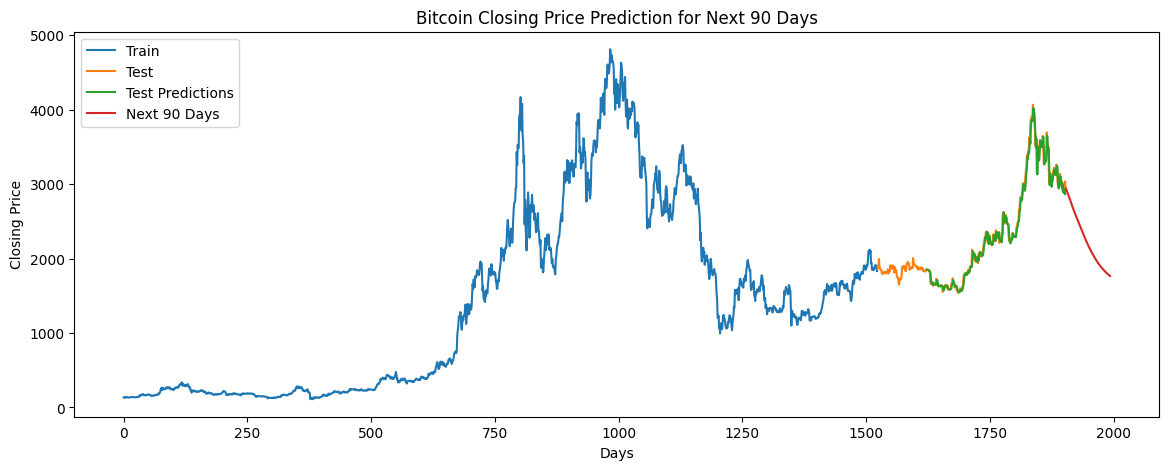

Predicted closing prices for the next 90 days:
[2940.9304 2918.0505 2900.7476 2883.921  2866.8154 2849.1611 2830.911
 2812.1501 2793.0244 2773.6982 2754.328  2735.048  2715.9624 2697.1484
 2678.6536 2660.5005 2642.6895 2625.2046 2608.015  2591.08   2574.3552
 2557.7905 2541.3413 2524.9646 2508.623  2492.2856 2475.9307 2459.544
 2443.1208 2426.6624 2410.1787 2393.6846 2377.2007 2360.75   2344.3586
 2328.0544 2311.864  2295.8135 2279.9275 2264.2266 2248.73   2233.4539
 2218.4106 2203.6094 2189.0566 2174.757  2160.711  2146.9185 2133.3774
 2120.0847 2107.0374 2094.2307 2081.6614 2069.3245 2057.2173 2045.3362
 2033.6796 2022.2452 2011.032  2000.0382 1989.2639 1978.7086 1968.3727
 1958.2555 1948.3574 1938.6777 1929.2168 1919.9727 1910.9452 1902.132
 1893.5317 1885.1423 1876.9603 1868.9832 1861.2075 1853.63   1846.247
 1839.0536 1832.0465 1825.221  1818.574  1812.1003 1805.7957 1799.6569
 1793.6788 1787.8579 1782.1906 1776.6729 1771.3011 1766.0721]


In [13]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **7:3**

In [14]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('ETH.csv')
df1=df.reset_index()['Close']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,2019-03-05,127.792953,138.229981,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...,...
1899,2024-05-12,2911.658203,2953.047363,2902.201904,2928.701904,2928.701904,5908941395
1900,2024-05-13,2928.813965,2994.869141,2865.134521,2949.359619,2949.359619,13352264795
1901,2024-05-14,2949.213135,2959.546631,2863.545898,2881.157959,2881.157959,12444516140
1902,2024-05-15,2881.224609,3041.602295,2864.735352,3037.056641,3037.056641,14666902956


In [15]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [17]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 12s 323ms/step - loss: 0.0298 - val_loss: 0.0022
Epoch 2/100
20/20 [==============================] - 4s 190ms/step - loss: 0.0042 - val_loss: 0.0014
Epoch 3/100
20/20 [==============================] - 4s 197ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 4/100
20/20 [==============================] - 5s 271ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 5/100
20/20 [==============================] - 4s 194ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 6/100
20/20 [==============================] - 4s 195ms/step - loss: 0.0025 - val_loss: 9.9531e-04
Epoch 7/100
20/20 [==============================] - 6s 282ms/step - loss: 0.0023 - val_loss: 9.8038e-04
Epoch 8/100
20/20 [==============================] - 4s 194ms/step - loss: 0.0022 - val_loss: 8.7990e-04
Epoch 9/100
20/20 [==============================] - 4s 190ms/step - loss: 0.0021 - val_loss: 9.4732e-04
Epoch 10/100
20/20 [==============================] - 6s 293ms/step - loss

In [22]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

15/15 [==============================] - 1s 64ms/step


In [23]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [24]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

Testing RMSE: 73.77494397656125
Testing MAE: 50.97439764833801
Testing MAPE: 0.022921497720289438


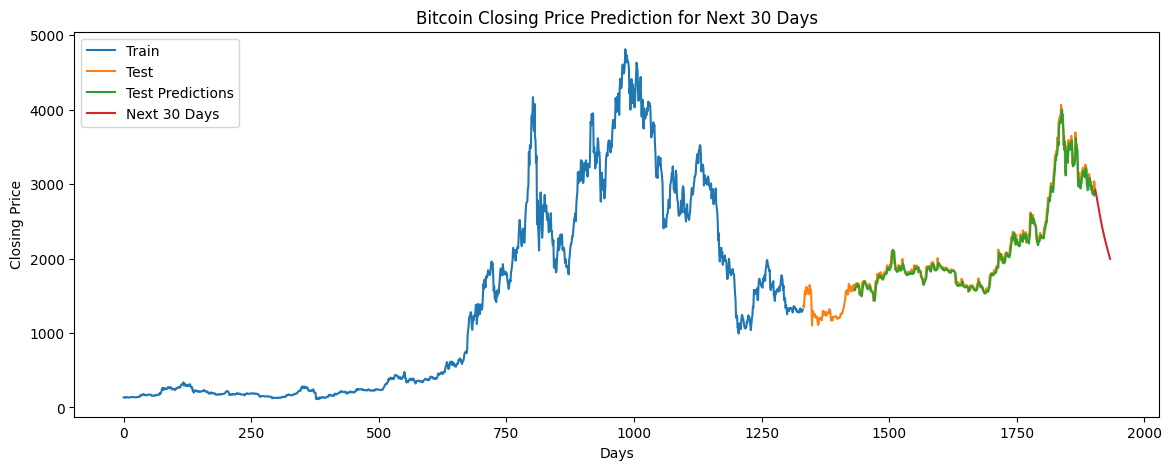

Predicted closing prices for the next 30 days:
[2924.0762 2888.361  2852.3918 2815.2585 2777.1997 2738.4465 2699.3022
 2660.124  2621.2668 2583.0364 2545.675  2509.346  2474.1418 2440.0896
 2407.1697 2375.3223 2344.4644 2314.4998 2285.3262 2256.8445 2228.9636
 2201.6047 2174.7017 2148.204  2122.0764 2096.2961 2070.854  2045.7507
 2020.9946 1996.6029]


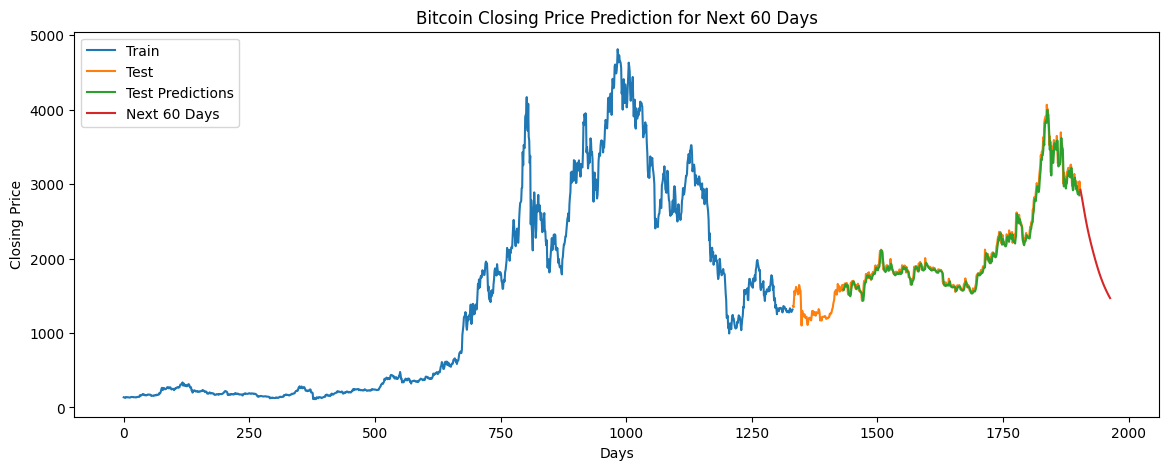

Predicted closing prices for the next 60 days:
[2924.0762 2888.361  2852.3918 2815.2585 2777.1997 2738.4465 2699.3022
 2660.124  2621.2668 2583.0364 2545.675  2509.346  2474.1418 2440.0896
 2407.1697 2375.3223 2344.4644 2314.4998 2285.3262 2256.8445 2228.9636
 2201.6047 2174.7017 2148.204  2122.0764 2096.2961 2070.854  2045.7507
 2020.9946 1996.6029 1972.5919 1948.9854 1925.8029 1903.0654 1880.7909
 1858.995  1837.688  1816.8774 1796.5676 1776.7577 1757.4442 1738.6205
 1720.2775 1702.404  1684.9877 1668.0138 1651.4684 1635.3363 1619.6034
 1604.2545 1589.2754 1574.6533 1560.3743 1546.4266 1532.7983 1519.4791
 1506.4585 1493.7264 1481.2745 1469.0928]


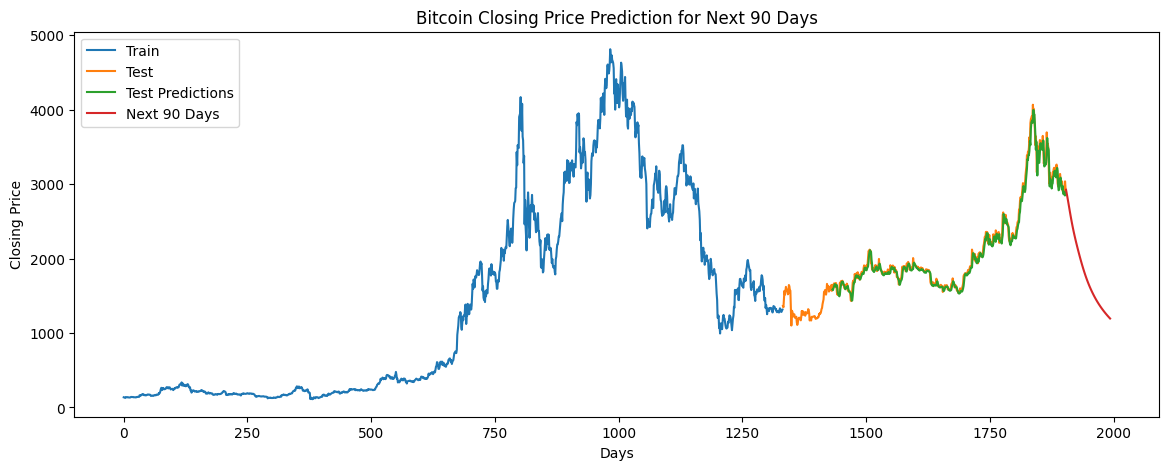

Predicted closing prices for the next 90 days:
[2924.0762 2888.361  2852.3918 2815.2585 2777.1997 2738.4465 2699.3022
 2660.124  2621.2668 2583.0364 2545.675  2509.346  2474.1418 2440.0896
 2407.1697 2375.3223 2344.4644 2314.4998 2285.3262 2256.8445 2228.9636
 2201.6047 2174.7017 2148.204  2122.0764 2096.2961 2070.854  2045.7507
 2020.9946 1996.6029 1972.5919 1948.9854 1925.8029 1903.0654 1880.7909
 1858.995  1837.688  1816.8774 1796.5676 1776.7577 1757.4442 1738.6205
 1720.2775 1702.404  1684.9877 1668.0138 1651.4684 1635.3363 1619.6034
 1604.2545 1589.2754 1574.6533 1560.3743 1546.4266 1532.7983 1519.4791
 1506.4585 1493.7264 1481.2745 1469.0928 1457.1732 1445.508  1434.0891
 1422.9083 1411.9586 1401.2322 1390.7227 1380.4225 1370.325  1360.4227
 1350.71   1341.1799 1331.826  1322.6431 1313.624  1304.7637 1296.0568
 1287.4974 1279.081  1270.802  1262.6566 1254.6396 1246.7467 1238.9741
 1231.3169 1223.7728 1216.3373 1209.0067 1201.7783 1194.6487]


In [25]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **6:4**

In [26]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('ETH.csv')
df1=df.reset_index()['Close']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,2019-03-05,127.792953,138.229981,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...,...
1899,2024-05-12,2911.658203,2953.047363,2902.201904,2928.701904,2928.701904,5908941395
1900,2024-05-13,2928.813965,2994.869141,2865.134521,2949.359619,2949.359619,13352264795
1901,2024-05-14,2949.213135,2959.546631,2863.545898,2881.157959,2881.157959,12444516140
1902,2024-05-15,2881.224609,3041.602295,2864.735352,3037.056641,3037.056641,14666902956


In [27]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [29]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 12s 294ms/step - loss: 0.0462 - val_loss: 0.0048
Epoch 2/100
17/17 [==============================] - 3s 207ms/step - loss: 0.0047 - val_loss: 0.0019
Epoch 3/100
17/17 [==============================] - 5s 283ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 4/100
17/17 [==============================] - 3s 203ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 5/100
17/17 [==============================] - 3s 206ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 6/100
17/17 [==============================] - 4s 254ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 7/100
17/17 [==============================] - 4s 252ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 8/100
17/17 [==============================] - 3s 205ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 9/100
17/17 [==============================] - 3s 208ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 10/100
17/17 [==============================] - 5s 301ms/step - loss: 0.0024 - val_l

In [34]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

21/21 [==============================] - 1s 42ms/step


In [35]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [36]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

Testing RMSE: 83.70032963295316
Testing MAE: 65.03138220100935
Testing MAPE: 0.03392862368739933


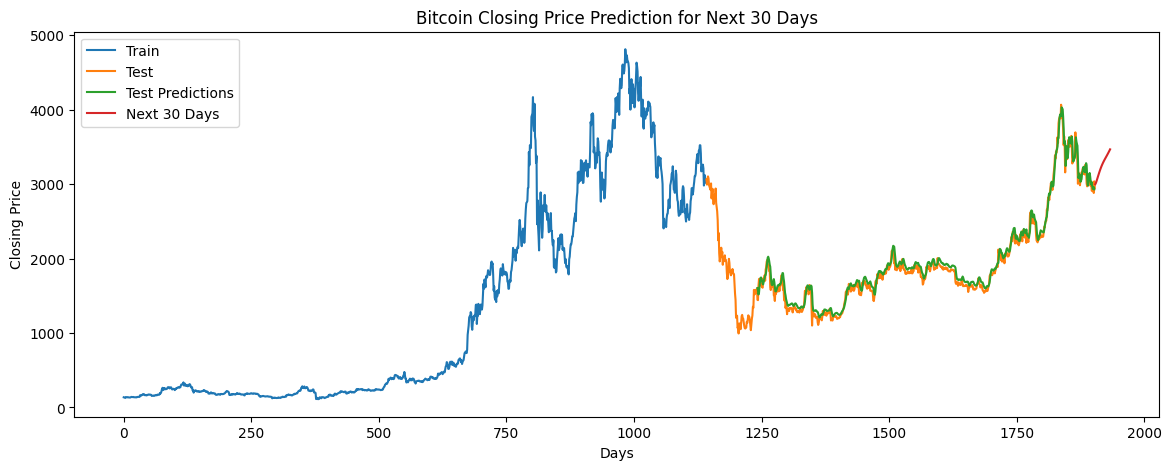

Predicted closing prices for the next 30 days:
[2998.8208 3011.6577 3030.7434 3051.9478 3073.9631 3096.194  3118.277
 3139.9585 3161.049  3181.404  3200.9128 3219.5015 3237.1338 3253.8147
 3269.5808 3284.5059 3298.6904 3312.2512 3325.3186 3338.031  3350.519
 3362.9067 3375.3037 3387.799  3400.4626 3413.3416 3426.4563 3439.8088
 3453.3806 3467.133 ]


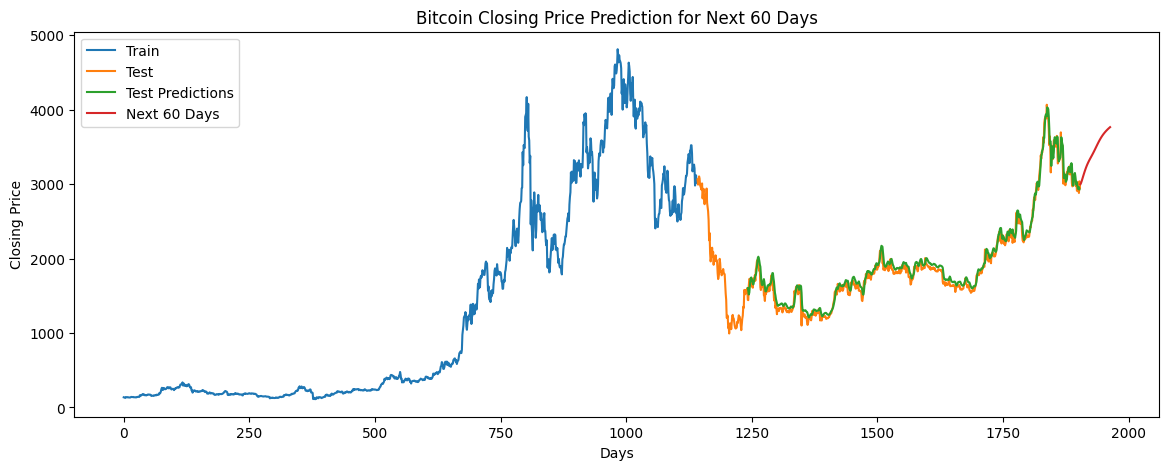

Predicted closing prices for the next 60 days:
[2998.8208 3011.6577 3030.7434 3051.9478 3073.9631 3096.194  3118.277
 3139.9585 3161.049  3181.404  3200.9128 3219.5015 3237.1338 3253.8147
 3269.5808 3284.5059 3298.6904 3312.2512 3325.3186 3338.031  3350.519
 3362.9067 3375.3037 3387.799  3400.4626 3413.3416 3426.4563 3439.8088
 3453.3806 3467.133  3481.016  3494.9678 3508.9204 3522.8025 3536.5432
 3550.0737 3563.3325 3576.262  3588.8184 3600.965  3612.6763 3623.937
 3634.7393 3645.0874 3654.991  3664.4685 3673.54   3682.231  3690.5693
 3698.581  3706.2942 3713.7341 3720.923  3727.882  3734.6252 3741.1685
 3747.5193 3753.6877 3759.6758 3765.4854]


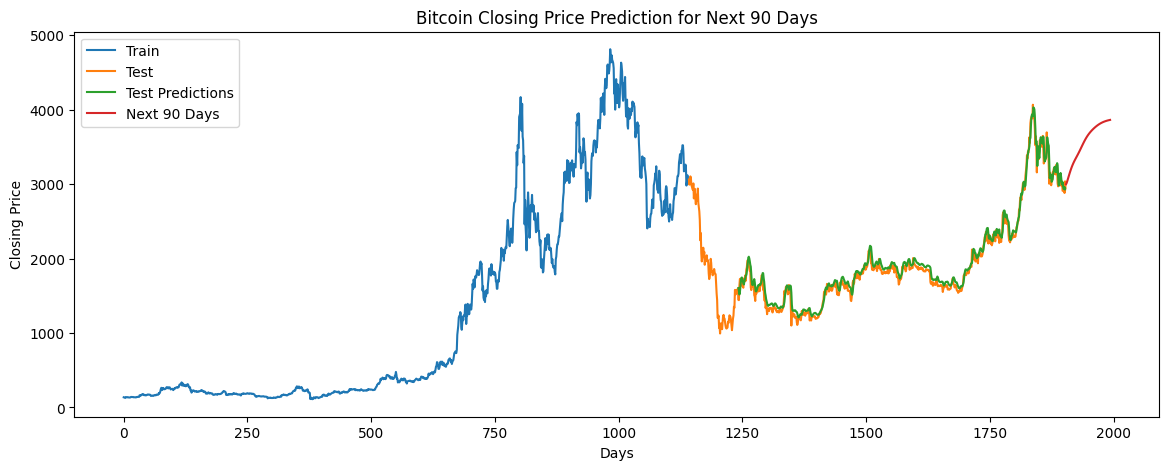

Predicted closing prices for the next 90 days:
[2998.8208 3011.6577 3030.7434 3051.9478 3073.9631 3096.194  3118.277
 3139.9585 3161.049  3181.404  3200.9128 3219.5015 3237.1338 3253.8147
 3269.5808 3284.5059 3298.6904 3312.2512 3325.3186 3338.031  3350.519
 3362.9067 3375.3037 3387.799  3400.4626 3413.3416 3426.4563 3439.8088
 3453.3806 3467.133  3481.016  3494.9678 3508.9204 3522.8025 3536.5432
 3550.0737 3563.3325 3576.262  3588.8184 3600.965  3612.6763 3623.937
 3634.7393 3645.0874 3654.991  3664.4685 3673.54   3682.231  3690.5693
 3698.581  3706.2942 3713.7341 3720.923  3727.882  3734.6252 3741.1685
 3747.5193 3753.6877 3759.6758 3765.4854 3771.118  3776.5725 3781.8462
 3786.938  3791.8445 3796.565  3801.0986 3805.4473 3809.6091 3813.5874
 3817.3833 3821.0027 3824.45   3827.7312 3830.851  3833.8167 3836.6345
 3839.31   3841.8516 3844.2656 3846.5571 3848.7336 3850.7996 3852.7605
 3854.6223 3856.3872 3858.0618 3859.6477 3861.149  3862.571 ]


In [37]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())